In [28]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pandas.util.testing as tm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import ( VarianceThreshold, RFECV, mutual_info_regression, 
                                       f_regression, SelectKBest )

In [30]:
df = pd.read_csv('data/HousePricing_full.csv', index_col='Id')
init_size = df.shape

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [32]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
df.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [34]:
numerical = df.drop('SalePrice', axis=1).select_dtypes(include=['float64', 'int64']).columns
numerical = [cname for cname in numerical if
                    df[cname].nunique() > 10]
df[numerical].describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,6.517808,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918
std,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,1.625393,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,6.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,7.000000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,14.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000


In [35]:
for i in df.columns:
    if(df[i].isna().mean()>.3):
        df.drop(i, axis=1, inplace=True)
df = df.dropna()

In [36]:
df.shape, init_size

((1094, 75), (1460, 80))

In [37]:
for i in numerical:
    df.drop(df[df[i] < df[i].quantile(.01)].index, inplace=True)
    df.drop(df[df[i] > df[i].quantile(.99)].index, inplace=True)

In [38]:
df.shape, init_size

((843, 75), (1460, 80))

In [39]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [40]:
categ = X.select_dtypes(exclude=['float64', 'int64']).columns
lab = LabelEncoder()
for i in categ:
    X[i] = lab.fit_transform(X[i])

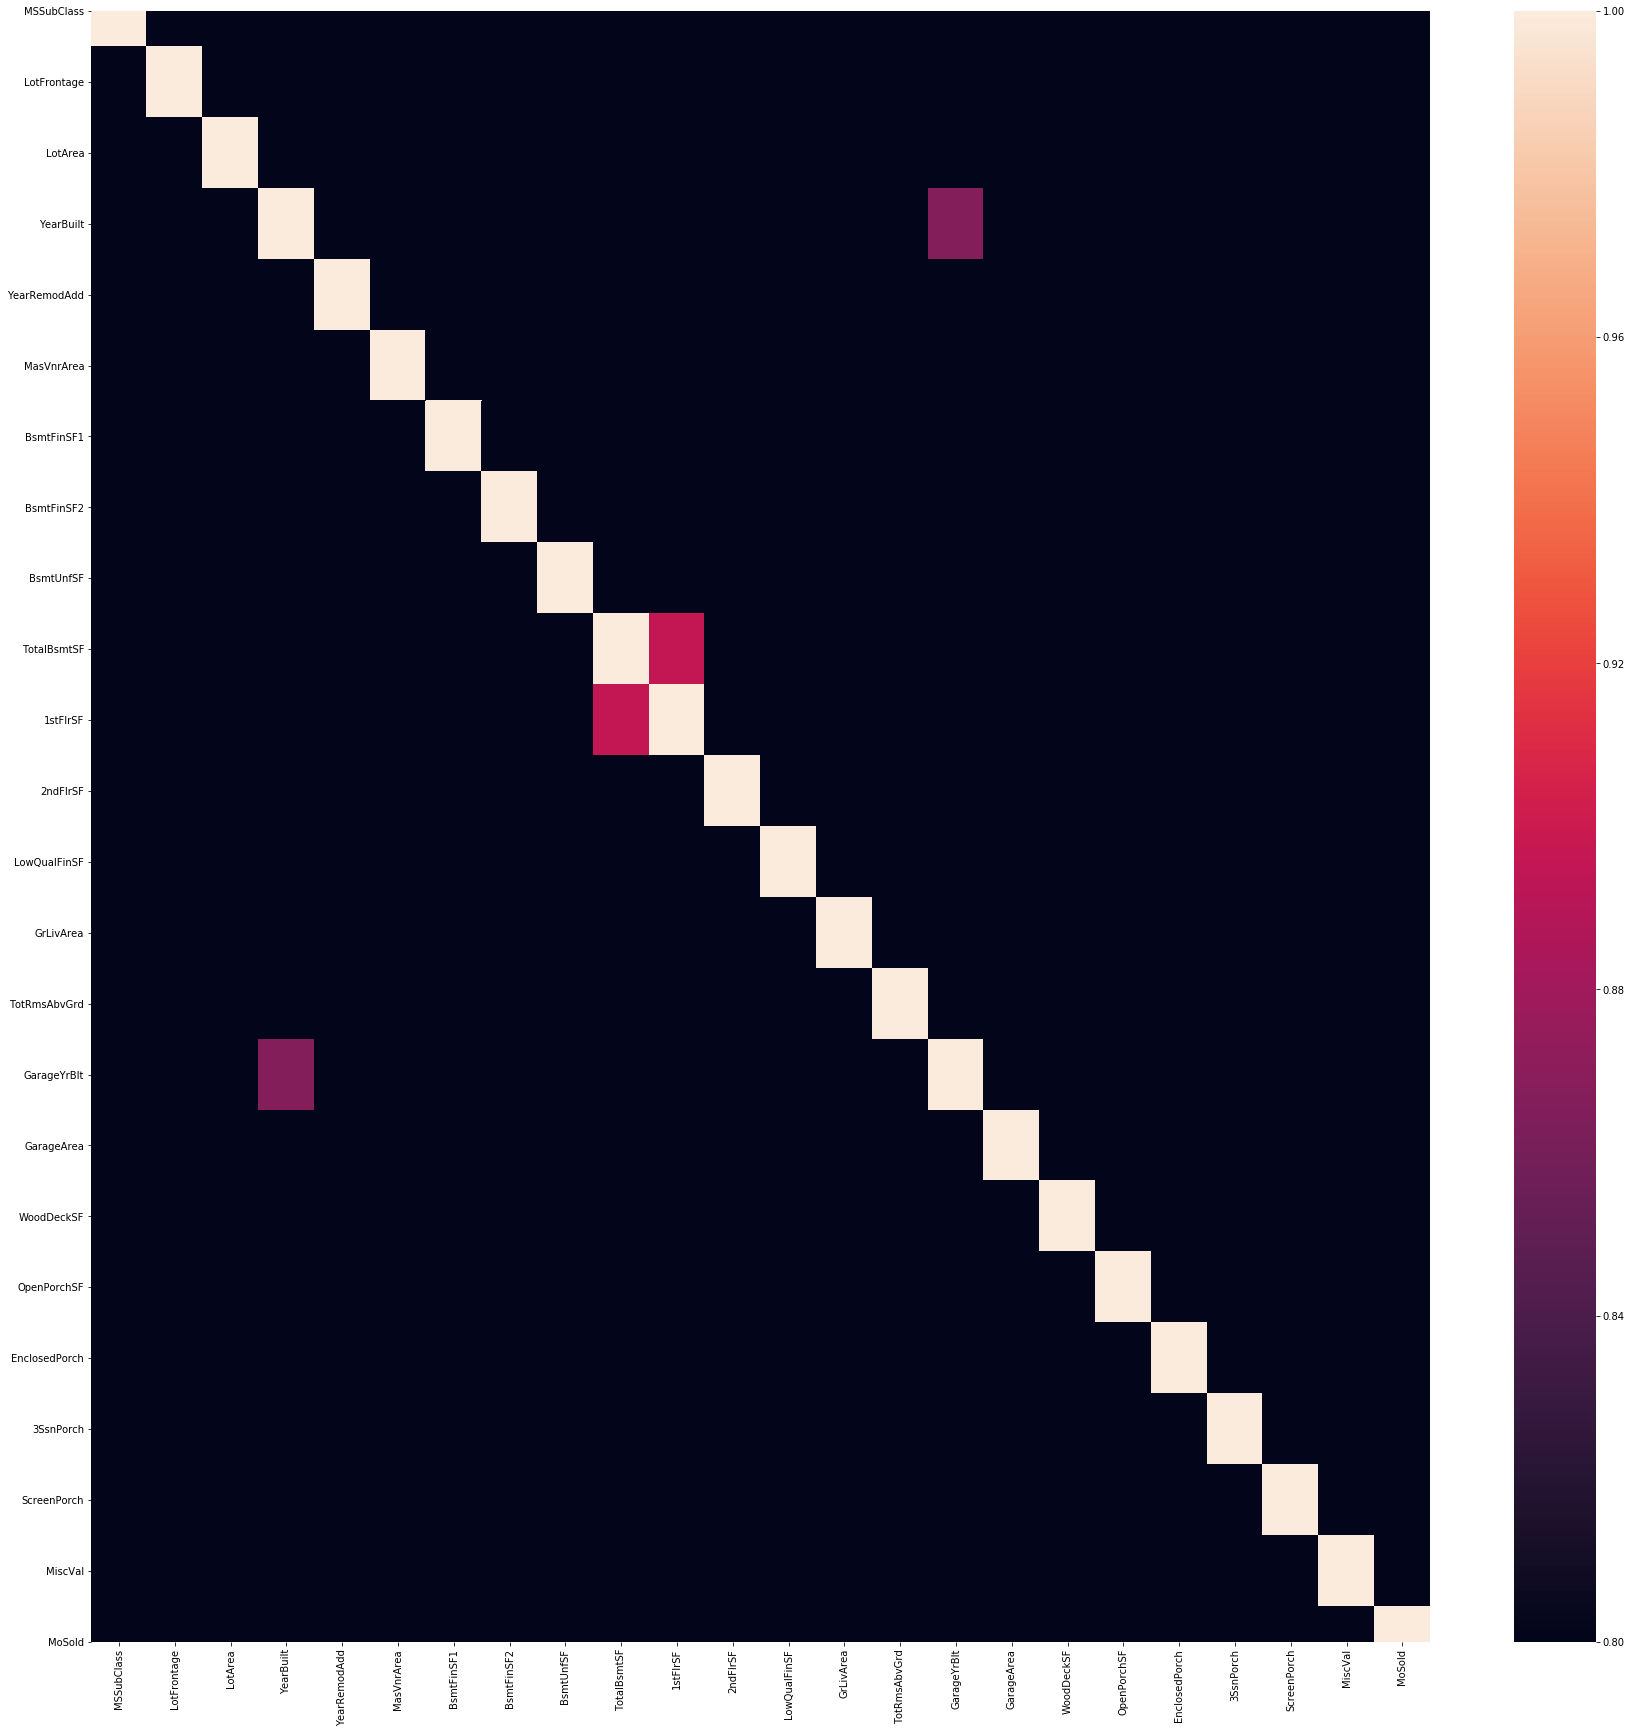

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(df[numerical].corr(), vmin=.8)

In [42]:
X.drop(['GarageYrBlt', 'GrLivArea', 'BsmtUnfSF'], axis=1, inplace=True)

In [43]:
scal = StandardScaler()
X = scal.fit_transform(X)

In [44]:
var = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = var.fit_transform(X)

In [45]:
selector = SelectKBest(f_regression, k=50)
X = selector.fit_transform(X, y)

In [46]:
model = LinearRegression(n_jobs=-1)
cv = KFold(shuffle=True, random_state=241)
cross_val_score(model, X, y, cv=cv, n_jobs=-1).mean()

0.8761769533629085

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=241, test_size=0.3)

In [48]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [49]:
mean_absolute_error(y_test, model.predict(X_test))

14331.91633250548

In [50]:
rid = RidgeCV()
rid.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [51]:
mean_absolute_error(y_test, rid.predict(X_test))

14364.71506054013

In [52]:
ls = LassoCV(n_jobs=-1)

In [53]:
grid = GridSearchCV(ls, cv=cv, param_grid={'eps':np.linspace(0.0001, 0.001, 10)})

In [54]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             error_score=nan,
             estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001,
                               fit_intercept=True, max_iter=1000, n_alphas=100,
                               n_jobs=-1, normalize=False, positive=False,
                               precompute='auto', random_state=None,
                               selection='cyclic', tol=0.0001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'eps': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
mean_absolute_error(y_test, grid.best_estimator_.predict(X_test))

14177.190887720199

In [56]:
grid.best_estimator_.score(X_test, y_test)

0.8978387234360019

Lasso the best!